In [265]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import numpy as np

In [266]:
import os
def format_data(input_dir):
    ### Iteriere über Ordner und prozessiere alle Dateien mit "Wahlprogramm" im Namen
    for filename in os.listdir(input_dir):
        if "Wahlprogramm" in filename and "fin" not in filename and ".csv" in filename:
            print(f"Processing file: {filename}")
            
            ### Prozessierung
            with open(filename, "r", encoding="utf8") as file:
                filedata = file.read()
                filedata = filedata.replace(';', ' -')
                filedata = filedata.replace('§', ';')
            ### Speichern in separate .csv file
            with open(filename[:-4]+"fin"+".csv", 'w', encoding="utf8") as file:
                file.write(filedata)
        else:
            continue
format_data("B:\\Unizeugs\\NLPProjekt\\NLP\\DBVis\\")

Processing file: AFD_Wahlprogramm_2021_hate.csv
Processing file: AFD_Wahlprogramm_2021_sentiment.csv
Processing file: AFD_Wahlprogramm_2021_topicpred_valhalla.csv
Processing file: AFD_Wahlprogramm_2021_topic_class.csv
Processing file: CDU-CSU_Wahlprogramm_2021_hate.csv
Processing file: CDU-CSU_Wahlprogramm_2021_sentiment.csv
Processing file: CDU-CSU_Wahlprogramm_2021_topicpred_valhalla.csv
Processing file: CDU-CSU_Wahlprogramm_2021_topic_class.csv
Processing file: DIE_GRUENEN_Wahlprogramm_2021_hate.csv
Processing file: DIE_GRUENEN_Wahlprogramm_2021_sentiment.csv
Processing file: DIE_GRUENEN_Wahlprogramm_2021_topicpred_valhalla.csv
Processing file: DIE_GRUENEN_Wahlprogramm_2021_topic_class.csv
Processing file: DIE_LINKE_Wahlprogramm_2021_hate.csv
Processing file: DIE_LINKE_Wahlprogramm_2021_sentiment.csv
Processing file: DIE_LINKE_Wahlprogramm_2021_topicpred_valhalla.csv
Processing file: DIE_LINKE_Wahlprogramm_2021_topic_class.csv
Processing file: FDP_Wahlprogramm_2021_hate.csv
Processi

In [267]:
hatelist=["AFD_Wahlprogramm_2021_hatefin.csv","CDU-CSU_Wahlprogramm_2021_hatefin.csv","DIE_GRUENEN_Wahlprogramm_2021_hatefin.csv","DIE_LINKE_Wahlprogramm_2021_hatefin.csv","FDP_Wahlprogramm_2021_hatefin.csv","SPD_Wahlprogramm_2021_hatefin.csv"]
sentimentlist=["AFD_Wahlprogramm_2021_sentimentfin.csv","CDU-CSU_Wahlprogramm_2021_sentimentfin.csv","DIE_GRUENEN_Wahlprogramm_2021_sentimentfin.csv","DIE_LINKE_Wahlprogramm_2021_sentimentfin.csv","FDP_Wahlprogramm_2021_sentimentfin.csv","SPD_Wahlprogramm_2021_sentimentfin.csv"]
topicpredlist=["AFD_Wahlprogramm_2021_topicpred_valhallafin.csv","CDU-CSU_Wahlprogramm_2021_topicpred_valhallafin.csv","DIE_GRUENEN_Wahlprogramm_2021_topicpred_valhallafin.csv","DIE_LINKE_Wahlprogramm_2021_topicpred_valhallafin.csv","FDP_Wahlprogramm_2021_topicpred_valhallafin.csv","SPD_Wahlprogramm_2021_topicpred_valhallafin.csv"]

In [268]:
#convert data for simple plots
hatedflist=[]
sentdflist=[]
topicdflist=[]
partrf=["AFD","CDU-CSU","GRUENE","LINKE","FDP","SPD"]
for i in hatelist:
    hatedflist+=[pd.read_csv(i, sep=";")]
for i in hatedflist:
    i.drop(columns = i.columns[0], axis = 1, inplace= True)

for i in sentimentlist:
    sentdflist+=[pd.read_csv(i, sep=";")]
for i in sentdflist:
    i.drop(columns = i.columns[0], axis = 1, inplace= True)

for i in topicpredlist:
    topicdflist+=[pd.read_csv(i, sep=";")]
for i in topicdflist:
    i.drop(columns = i.columns[0], axis = 1, inplace= True)
    i.drop(columns = i.columns[1], axis = 1, inplace= True)
    i.drop(columns = i.columns[1], axis = 1, inplace= True)
    i.drop(columns = i.columns[0], axis = 1, inplace= True)



In [269]:
#clean up topicdflist
for i in topicdflist:
    for h in i["Top 3"].index:
        prer1=i["Top 3"][h].split(', ')
        prer2=[]
        for k in prer1:
            prer2+=[k.strip("]['()")]
        prer3=[[prer2[0],prer2[1]],[prer2[2],prer2[3]],[prer2[4],prer2[5]]]
        i["Top 3"][h]=prer3

In [270]:
#Erstellung merged df zwischen sentiment und topic
topichatedflist=[]
topichatedflist=hatedflist.copy()
for i in range(len(topichatedflist)):
    topichatedflist[i] = pd.concat([topichatedflist[i],topicdflist[i]], axis=1)

In [271]:
def getcountpnn(inputdf):
    posc=0
    neuc=0
    negc=0
    for i in inputdf["label"]:
        if i=="neutral":
            neuc+=1
        elif i=="positiv":
            posc+=1
        elif i=="negativ":
            negc+=1
    return [posc, neuc, negc]

def createsentchartabs(inputlist, partrf):
    positiv=[]
    negativ=[]
    for i in inputlist:
        h=getcountpnn(i)
        positiv+=[h[0]]
        negativ+=[h[2]]
    labels=partrf
    x=np.arange(len(labels))
    width=0.35 #width of bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, positiv, width, label='positiv')
    rects2 = ax.bar(x + width/2, negativ, width, label='negativ')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Menge')
    ax.set_title('Sentiments der Parteien - absolut')
    ax.set_xticks(x, labels)
    ax.legend()
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    fig.tight_layout()
    plt.savefig("Sentiments-der-Parteien-absolut.png")
    plt.show()
    
def createsentchartrel(inputlist, partrf):
    positiv=[]
    negativ=[]
    for i in inputlist:
        h=getcountpnn(i)
        positiv+=[round(h[0]/(h[0]+h[1]+h[2]),2)]
        negativ+=[round(h[2]/(h[0]+h[1]+h[2]),2)]
    labels=partrf
    x=np.arange(len(labels))
    width=0.35 #width of bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, positiv, width, label='positiv')
    rects2 = ax.bar(x + width/2, negativ, width, label='negativ')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Menge')
    ax.set_title('Sentiments der Parteien - relativ')
    ax.set_xticks(x, labels)
    ax.legend()
    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)
    fig.tight_layout()
    plt.savefig("Sentiments-der-Parteien-relativ.png")
    plt.show()

def createhatechartabs(inputlist, partrf):
    negativ=[]
    for i in inputlist:
        h=getcountpnn(i)
        negativ+=[h[2]]
    labels=partrf
    x=np.arange(len(labels))
    width=0.35 #width of bars
    fig, ax = plt.subplots()
    rects2 = ax.bar(x + width/2, negativ, width, label='negativ')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Menge')
    ax.set_title('Hatespeech der Parteien - absolut')
    ax.set_xticks(x, labels)
    ax.bar_label(rects2, padding=3)
    fig.tight_layout()
    plt.savefig('Hatespeech-der-Parteien-absolut.png')
    plt.show()

def createhatechartrel(inputlist, partrf):
    negativ=[]
    for i in inputlist:
        h=getcountpnn(i)
        negativ+=[round(h[2]/(h[0]+h[1]+h[2]),4)]
    labels=partrf
    x=np.arange(len(labels))
    width=0.35 #width of bars
    fig, ax = plt.subplots()
    rects2 = ax.bar(x + width/2, negativ, width, label='negativ')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Menge')
    ax.set_title('Hatespeech der Parteien - relativ')
    ax.set_xticks(x, labels)
    ax.bar_label(rects2, padding=3)
    fig.tight_layout()
    plt.savefig("Hatespeech-der-Parteien-relativ.png")
    plt.show()

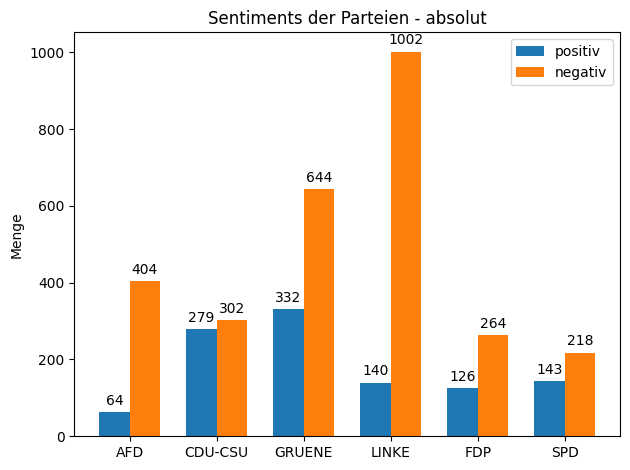

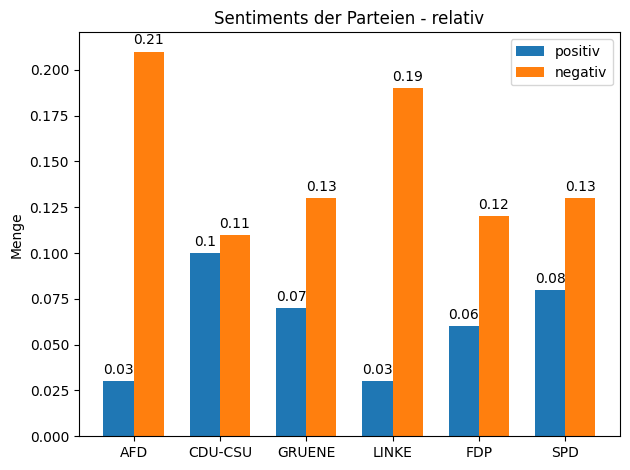

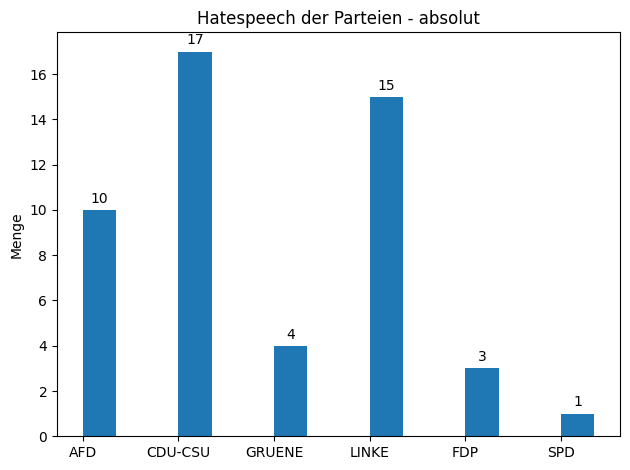

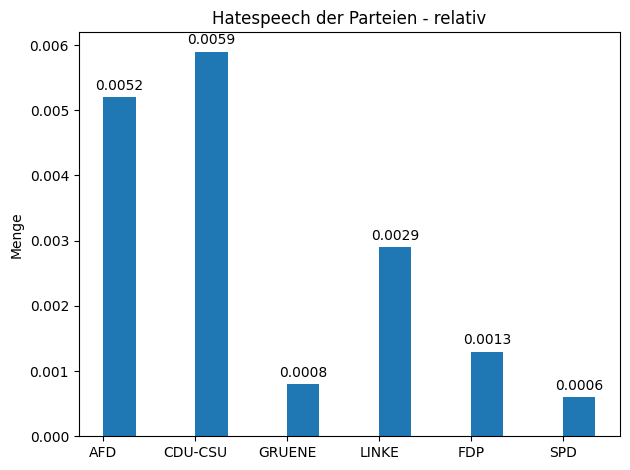

In [272]:
createsentchartabs(sentdflist,partrf)
createsentchartrel(sentdflist,partrf)
createhatechartabs(hatedflist,partrf)
createhatechartrel(hatedflist,partrf)

In [273]:
def getthemelist(inputdf): #Gibt eine liste aller Themen mit summierter Gewichtung im Text an
    themelist=[]
    vallist=[]
    themrf=['politik und ideologie', 'wirtschaft', 'bildung', 'gesundheit', 'soziale ursachen', 'klima', 'infrastruktur', 'wissenschaft']
    swert=0.3 #schwellwert für relevanz
    for i in inputdf["Top 3"]:
        for h in i:
            if h[0] in themelist and float(h[1])>swert:
                vallist[themelist.index(h[0])]+=float(h[1])
            if not h[0] in themelist and h[0] !="none" and float(h[1])>swert:
                themelist+=[h[0]]
                vallist+=[float(h[1])]
    #Ergänzung nicht benannter Themengebiete
    for i in themrf:
        if i not in themelist:
            themelist+=[i]
            vallist+=[0]
    #normalisierung der Werte
    sum=0
    for i in vallist:
        sum+=i
    for i in range(len(vallist)):
        if sum==0:
            vallist[i]=0
        else:
            vallist[i]=vallist[i]/sum
    return [themelist,vallist]

def getthemdistrplot(inputdf,namestr):
    hd=getthemelist(inputdf)
    barlabelspre=hd[0]
    barvalspre=hd[1]
    #themensortierung
    themrf=['politik und ideologie', 'wirtschaft', 'bildung', 'gesundheit', 'soziale ursachen', 'klima', 'infrastruktur', 'wissenschaft']
    barvals=[]
    for i in themrf:
        barvals+=[round(barvalspre[barlabelspre.index(i)], 4)]
    
    plt.bar(themrf,barvals,label="Themen")
    plt.title("Themenverteilung im Wahlprogramm - "+namestr)
    plt.ylabel("relativer Anteil")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('Themenverteilung-im-Wahlprogramm-'+ namestr+".png")
    plt.show()

def gethatethemedistrdf(inputdf): #Hier werden die themen der als hatespeech gezeichneten bereiche dargestellt
    hatedf=inputdf[inputdf["label"]=="negativ"].copy()
    hatedf.drop(columns = hatedf.columns[0], axis = 1, inplace= True)
    hatedf.drop(columns = hatedf.columns[0], axis = 1, inplace= True)
    hatedf.drop(columns = hatedf.columns[0], axis = 1, inplace= True)
    #print(hatedf)
    return hatedf



In [274]:
getthemelist(topicdflist[0])

[['gesundheit',
  'politik und ideologie',
  'bildung',
  'wirtschaft',
  'soziale ursachen',
  'infrastruktur',
  'wissenschaft',
  'klima'],
 [0.19735409485995148,
  0.21050423191334708,
  0.4092776844254224,
  0.09935790128908767,
  0.020108146798179887,
  0.025235731400090087,
  0.018282152294738025,
  0.019880057019183377]]

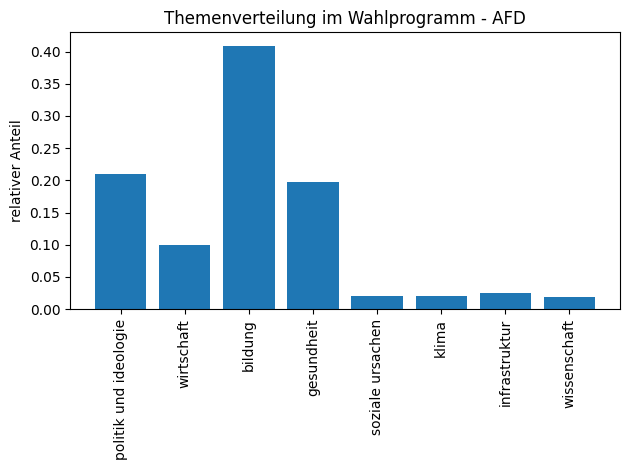

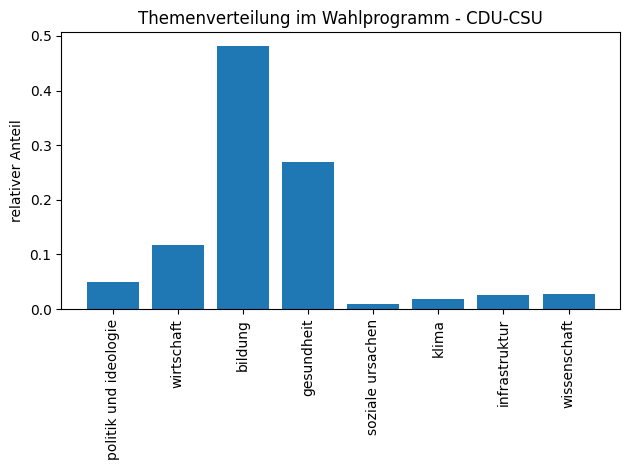

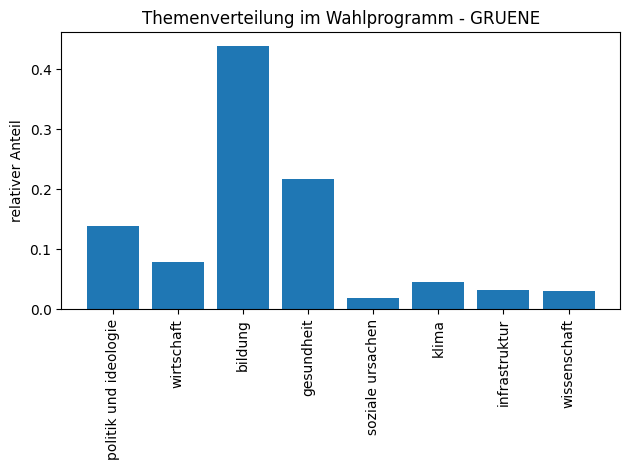

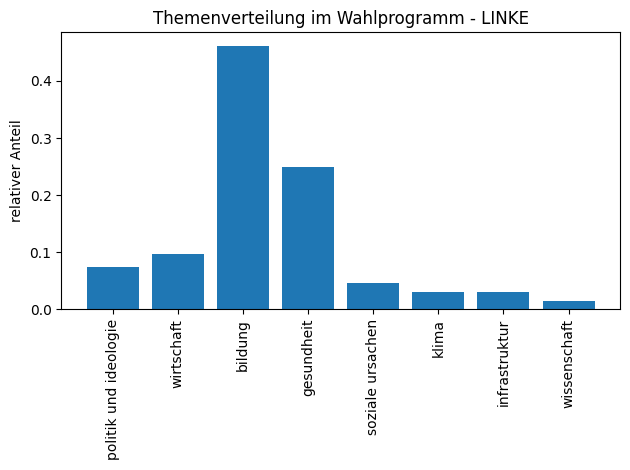

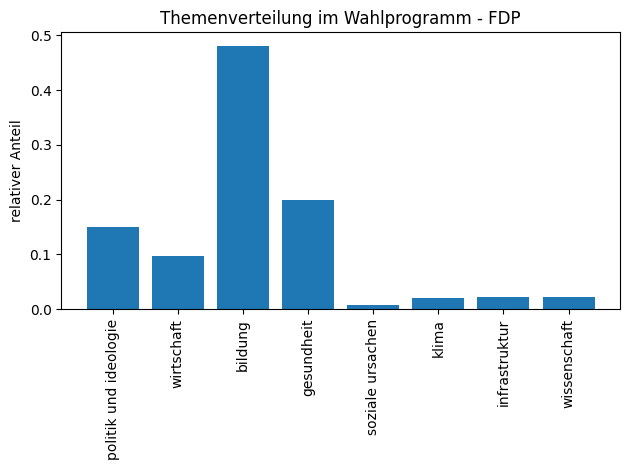

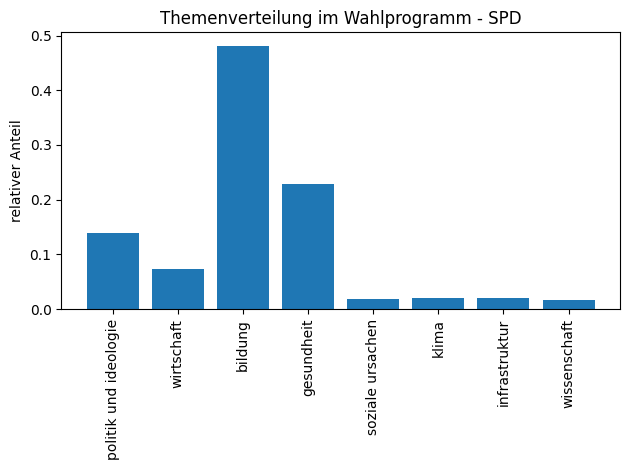

In [275]:
for i in range(len(topicdflist)):
    getthemdistrplot(topicdflist[i],partrf[i])

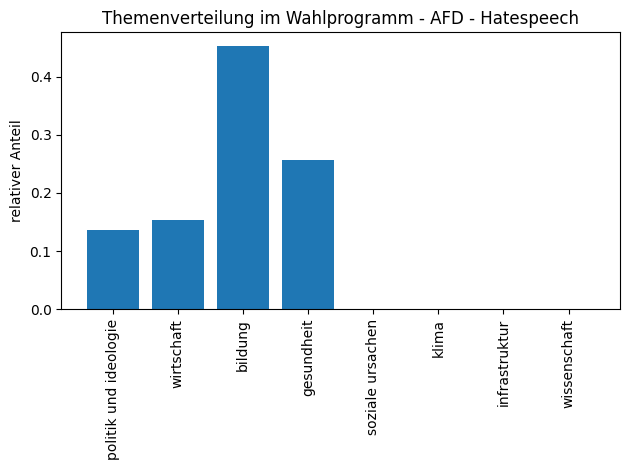

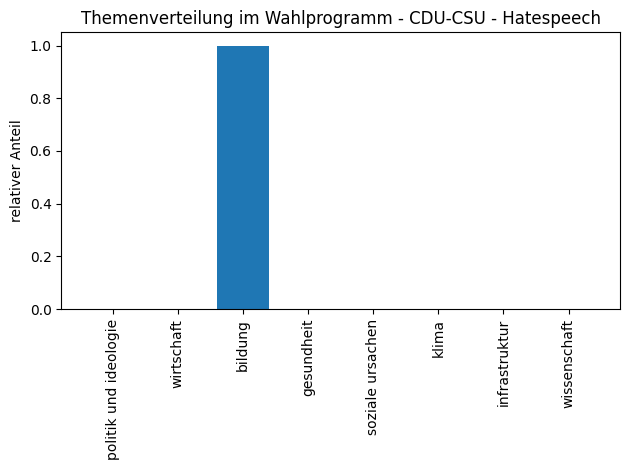

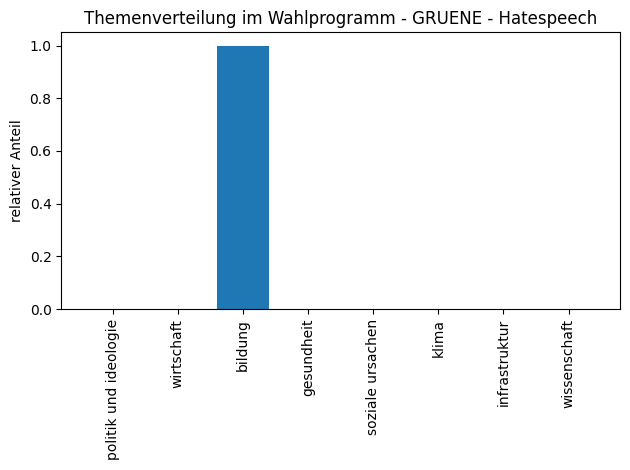

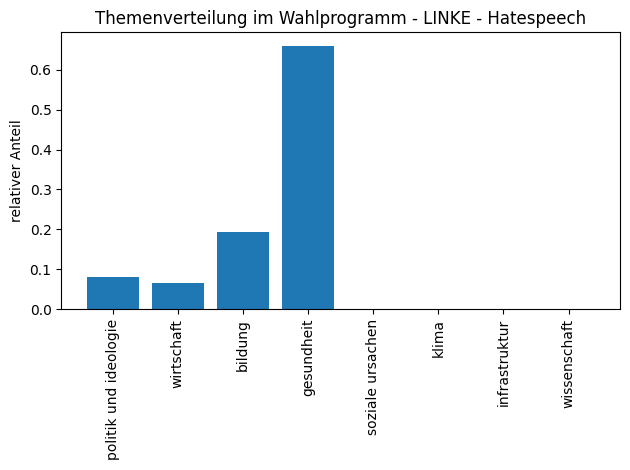

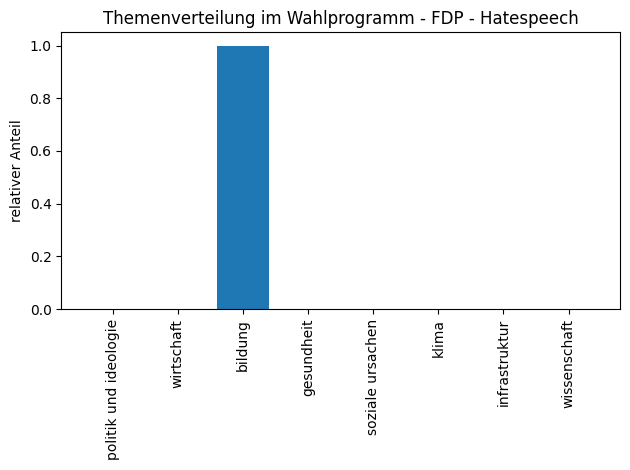

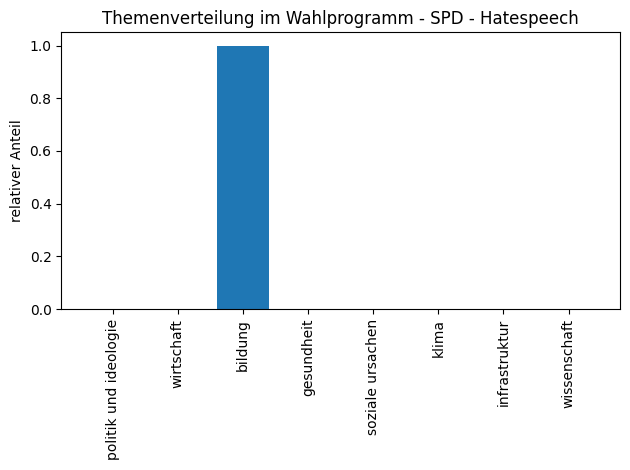

In [276]:
for i in range(len(topichatedflist)):
    getthemdistrplot(gethatethemedistrdf(topichatedflist[i]), partrf[i]+" - Hatespeech")

In [277]:
def getcombplot_hatetopicdistr(inputdfallg,inputdfneg,partbez):
    themrf=['politik und ideologie', 'wirtschaft', 'bildung', 'gesundheit', 'soziale ursachen', 'klima', 'infrastruktur', 'wissenschaft']
    hdallg=getthemelist(inputdfallg)
    allgemeinpre=hdallg[1]
    labelallgemeinpre=hdallg[0]
    hdneg=getthemelist(inputdfneg)
    negativpre=hdneg[1]
    labelnegativpre=hdneg[0]
    #sortierung von dem ersten datensatz
    allgemein=[]
    for i in themrf:
        allgemein+=[round(allgemeinpre[labelallgemeinpre.index(i)],2)]

    #sortierung von dem zweiten datensatz
    negativ=[]
    for i in themrf:
        negativ+=[round(negativpre[labelnegativpre.index(i)], 2)]
    
    x=np.arange(len(themrf))
    width=0.45 #width of bars
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, allgemein, width, label='Allgemein')
    rects2 = ax.bar(x + width/2, negativ, width, label='Hatespeech')
    ax.set_ylabel('Relative Menge')
    ax.set_title('Vergleich der Themenverteilung Allgemein und in Hatespeech - relativ - '+ partbez, pad=20)
    ax.set_xticks(x, themrf, rotation=90)
    ax.legend()
    ax.bar_label(rects1, padding=5, rotation=90)
    ax.bar_label(rects2, padding=5, rotation=90)
    ax.set_ylim([0, 1.1])
    fig.tight_layout()
    plt.savefig('Vergleich-der-Themenverteilung-Allgemein-und-in-Hatespeech-relativ-'+ partbez+".png")
    plt.show()

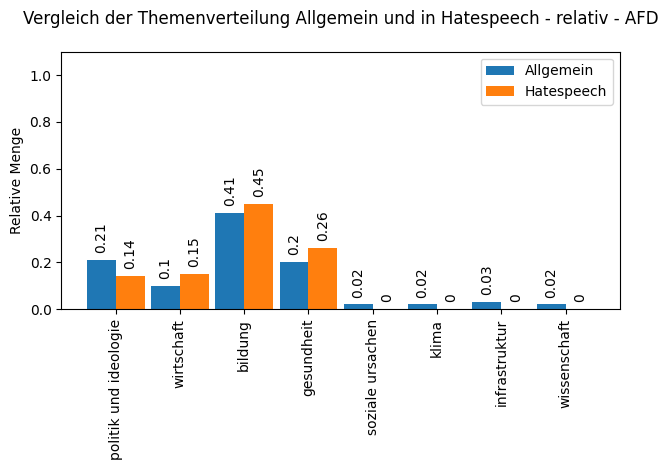

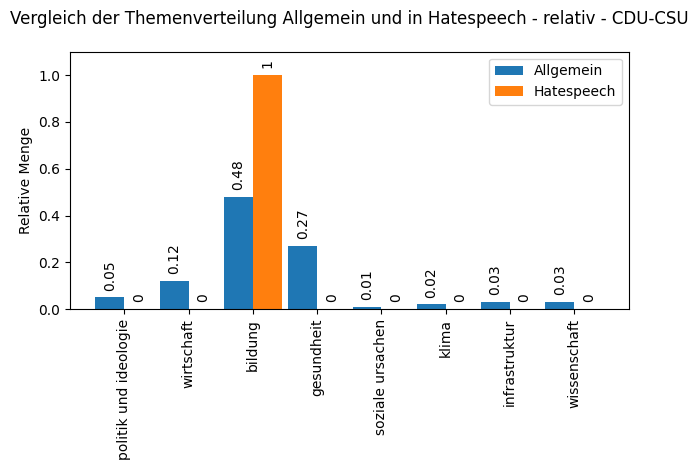

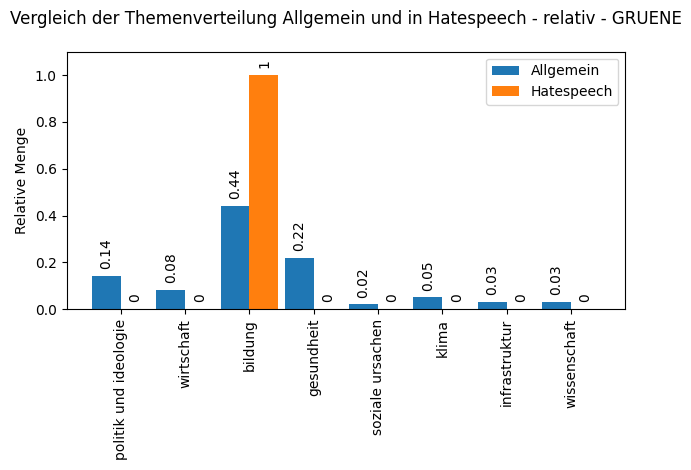

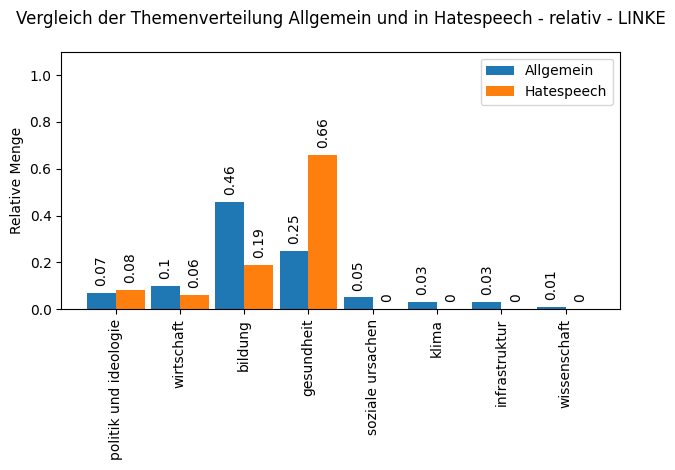

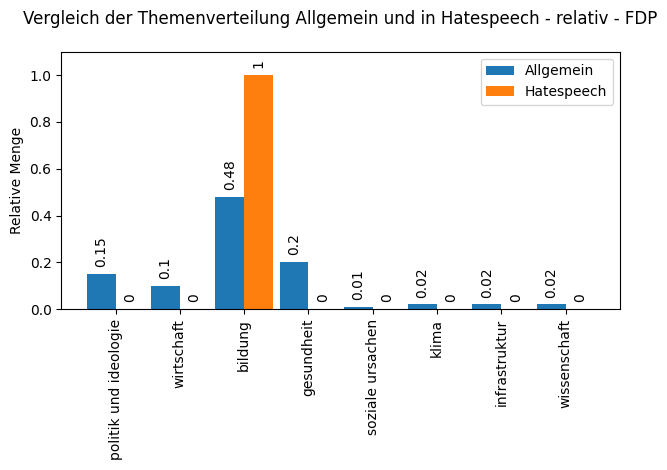

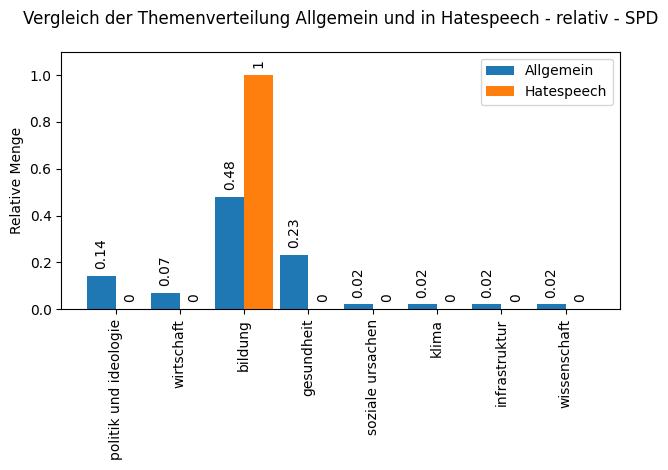

In [278]:
for i in range(len(topicdflist)):
    getcombplot_hatetopicdistr(topicdflist[i],gethatethemedistrdf(topichatedflist[i]) ,partrf[i])

In [279]:
def getfindata():#create merged df für clusterabbildung mit topicseparierung
    df1l=hatedflist.copy()
    df2l=sentdflist.copy()
    df3l=topicdflist.copy()
    for i in range(len(df1l)):
        df1l[i]=df1l[i].rename(columns={'label': 'hatelabel', 'score': 'hatescore'})
    for i in range(len(df2l)):
        df2l[i]=df2l[i].rename(columns={'label': 'sentlabel', 'score': 'sentscore'})
    partrf=["AFD","CDU-CSU","GRUENE","LINKE","FDP","SPD"]
    dfges=[]
    for i in range(len(df1l)):
        dfges+=[pd.concat([df1l[i],pd.concat([df2l[i],df3l[i]], axis=1)], axis=1)]

    #topicreinigung, nur klassifizierungen mit genauigkeit größer 0.4 bleiben bestehen
    for i in range(len(dfges)):
        for j in dfges[i]["Top 3"].index:
            if float(dfges[i]["Top 3"][j][0][1]) > 0.3: #topicschwellwert 0.4
                dfges[i]["Top 3"][j]=dfges[i]["Top 3"][j][0][0]
            else:
                dfges[i]["Top 3"][j]="none"

    #drop lines with "none" as "Top 3"
    for i in range(len(dfges)):
        dfges[i]=dfges[i][dfges[i]["Top 3"]!="none"].reset_index()

    #Erstellung finales df
    findata=[]
    for i in range(len(dfges)):
        for j in dfges[i]["Top 3"].unique(): #Partei, Thema, hate, Sentimentpositiv, Sentimentnegativ
            findata+=   [[partrf[i], 
                        j, 
                        round(dfges[i][(dfges[i]["Top 3"]==j) & (dfges[i]["hatelabel"]=="negativ")].hatelabel.count()/dfges[i][dfges[i]["Top 3"]==j].hatelabel.count(),6),
                        round(dfges[i][(dfges[i]["Top 3"]==j) & (dfges[i]["sentlabel"]=="positiv")].sentlabel.count()/dfges[i][dfges[i]["Top 3"]==j].sentlabel.count(),6),
                        round(dfges[i][(dfges[i]["Top 3"]==j) & (dfges[i]["sentlabel"]=="negativ")].sentlabel.count()/dfges[i][dfges[i]["Top 3"]==j].sentlabel.count(),6)]]
    return findata

def getfindataohneSWert():#create merged df für clusterabbildung ohne topicseparierung
    df1l=hatedflist.copy()
    df2l=sentdflist.copy()
    df3l=topicdflist.copy()
    for i in range(len(df1l)):
        df1l[i]=df1l[i].rename(columns={'label': 'hatelabel', 'score': 'hatescore'})
    for i in range(len(df2l)):
        df2l[i]=df2l[i].rename(columns={'label': 'sentlabel', 'score': 'sentscore'})
    partrf=["AFD","CDU-CSU","GRUENE","LINKE","FDP","SPD"]
    dfges=[]
    for i in range(len(df1l)):
        dfges+=[pd.concat([df1l[i],pd.concat([df2l[i],df3l[i]], axis=1)], axis=1)]

    #topicreinigung, nur klassifizierungen mit genauigkeit größer 0.4 bleiben bestehen
    for i in range(len(dfges)):
        for j in dfges[i]["Top 3"].index:
            if float(dfges[i]["Top 3"][j][0][1]) > 0:
                dfges[i]["Top 3"][j]=dfges[i]["Top 3"][j][0][0]
            else:
                dfges[i]["Top 3"][j]="none"

    #drop lines with "none" as "Top 3"
    for i in range(len(dfges)):
        dfges[i]=dfges[i][dfges[i]["Top 3"]!="none"].reset_index()

    #Erstellung finales df
    findata=[]
    for i in range(len(dfges)):
        for j in dfges[i]["Top 3"].unique(): #Partei, Thema, hate, Sentimentpositiv, Sentimentnegativ
            findata+=   [[partrf[i], 
                        j, 
                        round(dfges[i][(dfges[i]["Top 3"]==j) & (dfges[i]["hatelabel"]=="negativ")].hatelabel.count()/dfges[i][dfges[i]["Top 3"]==j].hatelabel.count(),6),
                        round(dfges[i][(dfges[i]["Top 3"]==j) & (dfges[i]["sentlabel"]=="positiv")].sentlabel.count()/dfges[i][dfges[i]["Top 3"]==j].sentlabel.count(),6),
                        round(dfges[i][(dfges[i]["Top 3"]==j) & (dfges[i]["sentlabel"]=="negativ")].sentlabel.count()/dfges[i][dfges[i]["Top 3"]==j].sentlabel.count(),6)]]
    return findata

findata=getfindata()
print(findata)


C:\Users\JDari\AppData\Local\Temp\ipykernel_8432\1953018371.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JDari\AppData\Local\Temp\ipykernel_8432\1953018371.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[['AFD', 'gesundheit', 0.011407, 0.045627, 0.239544], ['AFD', 'politik und ideologie', 0.00365, 0.00365, 0.156934], ['AFD', 'bildung', 0.007042, 0.040493, 0.18662], ['AFD', 'wirtschaft', 0.009174, 0.045872, 0.211009], ['AFD', 'soziale ursachen', 0.0, 0.037037, 0.444444], ['AFD', 'infrastruktur', 0.0, 0.0, 0.142857], ['AFD', 'wissenschaft', 0.0, 0.0, 0.142857], ['AFD', 'klima', 0.0, 0.041667, 0.083333], ['CDU-CSU', 'gesundheit', 0.0, 0.101167, 0.095331], ['CDU-CSU', 'bildung', 0.001074, 0.092374, 0.068743], ['CDU-CSU', 'klima', 0.0, 0.147059, 0.058824], ['CDU-CSU', 'politik und ideologie', 0.0, 0.121951, 0.158537], ['CDU-CSU', 'wirtschaft', 0.0, 0.176796, 0.055249], ['CDU-CSU', 'infrastruktur', 0.0, 0.130435, 0.065217], ['CDU-CSU', 'wissenschaft', 0.0, 0.175, 0.025], ['CDU-CSU', 'soziale ursachen', 0.0, 0.055556, 0.055556], ['GRUENE', 'bildung', 0.00223, 0.139033, 0.084015], ['GRUENE', 'politik und ideologie', 0.0, 0.016627, 0.042755], ['GRUENE', 'wirtschaft', 0.0, 0.055838, 0.101523], 

In [280]:
import plotly.express as px
# Create the pandas DataFrame
dffin = pd.DataFrame(findata, columns=['Partei','Topic','Hatespeech','Sentiment-positiv','Sentiment-negativ'])
fig = px.scatter(dffin, x="Sentiment-positiv", y="Sentiment-negativ",
	         size="Hatespeech", color="Partei",
                 hover_name="Topic", log_x=True, size_max=60,
                 title="Hatespeechvergleich je Partei und Themengebiet")
fig.write_html("Hatespeechvergleich-je-Partei-und-Themengebiet.html",
                full_html=False,
                include_plotlyjs='cdn')
fig.show()

In [281]:
# Create the pandas DataFrame
dffinoTpre = pd.DataFrame(getfindataohneSWert(), columns=['Partei','Topic','Hatespeech','Sentiment-positiv','Sentiment-negativ'])
dffinoT = dffinoTpre.groupby(["Partei"], as_index=False)[["Hatespeech","Sentiment-positiv","Sentiment-negativ"]].sum()
fig = px.scatter(dffinoT, x="Sentiment-positiv", y="Sentiment-negativ",
	            size="Hatespeech", color="Partei",
                 hover_name="Partei", log_x=True, size_max=60,
                 title="Hatespeechvergleich je Partei")
fig.write_html("Hatespeechvergleich-je-Partei.html",
                full_html=False,
                include_plotlyjs='cdn')
fig.show()


C:\Users\JDari\AppData\Local\Temp\ipykernel_8432\1953018371.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [287]:
def returnthemdistrplot(inputdf,namestr):
    hd=getthemelist(inputdf)
    barlabelspre=hd[0]
    barvalspre=hd[1]
    #themensortierung
    themrf=['politik und ideologie', 'wirtschaft', 'bildung', 'gesundheit', 'soziale ursachen', 'klima', 'infrastruktur', 'wissenschaft']
    barvals=[]
    for i in themrf:
        barvals+=[round(barvalspre[barlabelspre.index(i)], 4)]
    fig, ax = plt.subplots()
    plt.bar(themrf,barvals,label="Themen")
    plt.title("Themenverteilung im Wahlprogramm - "+namestr)
    plt.ylabel("relativer Anteil")
    plt.xticks(rotation=90)
    plt.tight_layout()
    #plt.savefig('Themenverteilung-im-Wahlprogramm-'+ namestr+".png")
    #plt.show()
    return fig

def getchart(partei):
    partrf=["AFD","CDU-CSU","GRUENE","LINKE","FDP","SPD"]
    if partei==partrf[0]:
        i=0
        return returnthemdistrplot(topicdflist[i],partrf[i])
    if partei==partrf[1]:
        i=1
        return returnthemdistrplot(topicdflist[i],partrf[i])
    if partei==partrf[2]:
        i=2
        return returnthemdistrplot(topicdflist[i],partrf[i])
    if partei==partrf[3]:
        i=3
        return returnthemdistrplot(topicdflist[i],partrf[i])
    if partei==partrf[4]:
        i=4
        return returnthemdistrplot(topicdflist[i],partrf[i])
    if partei==partrf[5]:
        i=5
        return returnthemdistrplot(topicdflist[i],partrf[i])

def gethatechart(partei): #hatespeechthemenverteilung von parteien
    partrf=["AFD","CDU-CSU","GRUENE","LINKE","FDP","SPD"]
    if partei==partrf[0]:
        i=0
        return returnthemdistrplot(gethatethemedistrdf(topichatedflist[i]),partrf[i])
    if partei==partrf[1]:
        i=1
        return returnthemdistrplot(gethatethemedistrdf(topichatedflist[i]),partrf[i])
    if partei==partrf[2]:
        i=2
        return returnthemdistrplot(gethatethemedistrdf(topichatedflist[i]),partrf[i])
    if partei==partrf[3]:
        i=3
        return returnthemdistrplot(gethatethemedistrdf(topichatedflist[i]),partrf[i])
    if partei==partrf[4]:
        i=4
        return returnthemdistrplot(gethatethemedistrdf(topichatedflist[i]),partrf[i])
    if partei==partrf[5]:
        i=5
        return returnthemdistrplot(gethatethemedistrdf(topichatedflist[i]),partrf[i])

C:\Users\JDari\AppData\Local\Temp\ipykernel_8432\2164670976.py:1: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

C:\Users\JDari\AppData\Local\Temp\ipykernel_8432\2164670976.py:2: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



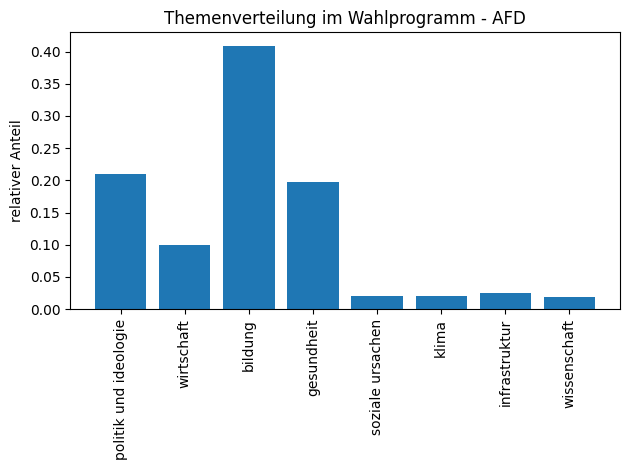

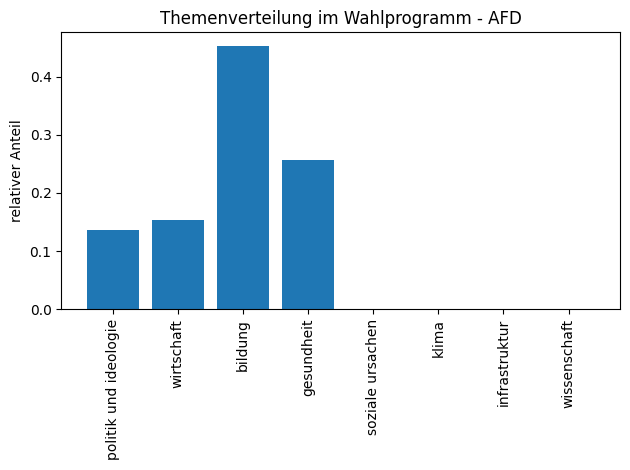

In [288]:
getchart("AFD").show()
gethatechart("AFD").show()